In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from tensorflow.keras.optimizers import RMSprop,Adam

In [115]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [116]:
import os
print(os.listdir("C:\\Users\\avirr\\Jupyter Lab\\env1\\SureStart\\Day 9 (7-14)\\input"))

['sample_submission.csv', 'test.csv', 'test.csv.zip', 'train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 'train.csv', 'train.csv.zip']


In [117]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, 'Number of digit classes')

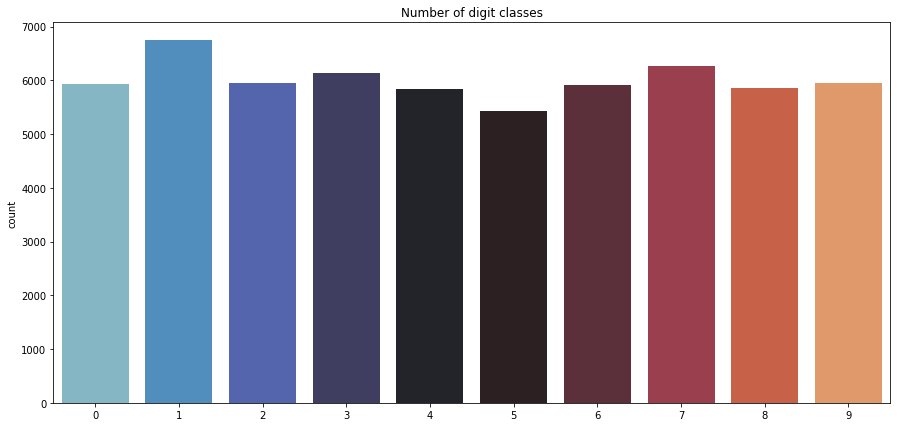

In [118]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")


In [119]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

x_train shape:  (60000, 28, 28)
test shape:  (10000, 28, 28)


In [120]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [121]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [122]:
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.metrics import confusion_matrix


model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu', ))

model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])



In [123]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(X_train)

In [124]:
batch_size = 250
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size = batch_size),
                              epochs = 10, validation_data = (X_test,y_test), steps_per_epoch=X_train.shape[0] // batch_size)

240/240 [==============================] - 42s 172ms/step - loss: 0.7898 - accuracy: 0.7397 - val_loss: 0.1340 - val_accuracy: 0.9609


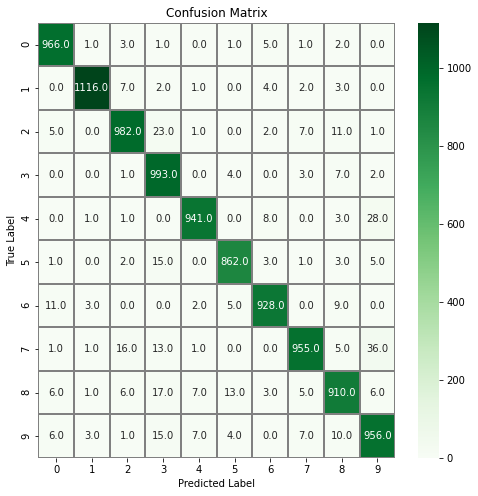

In [125]:
import seaborn as sns

y_pred = np.argmax(model.predict(X_test), axis=-1)

y_test_full = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_test_full, y_pred)


f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()